Write a program to find the minimum of

$ f(x, y) = x^2/2 + y^2/3 -xy/4 $

1, from your own code (except Monte Carlo)

2, from scipy

# Part 1

In Calculus III, we learned for the first time to work with multivariable functions. Also, it was the first course where we learned how to optimize functions using partial derivatives. While most multivariable functions in Calculus III could be optimized analytically, there are still many that cannot be done by hand alone and therefore, requires the use of computers. Let us first define our function of interest before we go any further. Let me also define the derivative function for a single function because we might also need it later.

In [33]:
import numpy as np
from scipy.optimize import minimize as Min
import matplotlib.pyplot as plt
%matplotlib inline

def f(x, y):
    return (1/2)*x**2 + (1/3)*y**2 - x*y/4

def derivative(f, x):
    h = 0.00000001
    numerator = f(x + h) - f(x)
    return numerator/h

def minimize(f, x0, step):
    x_now = x0
    x_next = x_now - step
    while derivative(f, x_next) > 0:
        x_now = x_next
        x_next = x_now - step
        if derivative(f, x_next) < 0:
            x_now = x_next + step
            x_next = x_now - 0.00001
            while f(x_next) < f(x_now):
                x_now = x_next
                x_next = x_now - 0.00001
    return x_now

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

Let us consider the following:

# $ A = f_{xx}(x_0, y_0) $ is the second partial derivative with respect to both $ x $.

# $ B = f_{xy}(x_0, y_0) $ is the partial derivative with respect to $ x $ and then $ y $. 

# $ C = f_{yy}(x_0, y_0) $ is the second partial derivative with respect to both $ y $.

The rules are as follows:

* If $ AC - B^2 > 0 $ and $ A > 0 $, then $ f $ has a local minimum at $ (x_0, y_0) $.

* If $ AC - B^2  >0 $ and $ A < 0 $, then $ f $ has a local maximum at $ (x_0, y_0) $.

But I am not going to do it this way, because it is not scientific computing. Instead, I will do what I did in the previous homework, which is to break the whole function into smaller parts and find the minimum for those individually.

In [16]:
def f1(x):
    return (1/2)*x**2
def g(y):
    return (1/3)*y**2

# Minimize $ f(x) $:

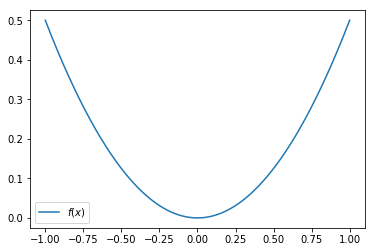

In [17]:
x1 = np.linspace(-1, 1, 10000)
y1 = f1(x1)
plt.plot(x1, y1, label = '$ f(x) $')
plt.legend()
plt.show()

An initial guess would be any value of x to the right of the minimum. I would pick $ x = 1 $.

In [18]:
x_best = minimize(f1, 1, 1)
print(x_best)

0


# Minimize $ g(y) $:

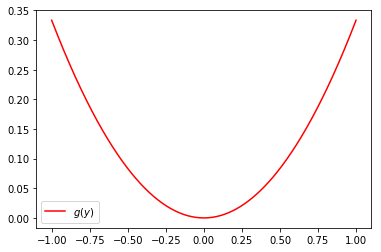

In [11]:
x2 = x1
y2 = g(x2)
plt.plot(x2, y2, 'r', label = '$ g(y) $')
plt.legend()
plt.show()

The same as before!!! We just pick any x value to the right of the lowest point. I would pick $ x = 1 $.

In [19]:
y_best = minimize(g, 1, 1)
print(y_best)

0


This means that $ x_0 = 0$ and $ y_0 = 0 $. So the minimum must be at $ (0, 0, f(0, 0)) = (0, 0, 0) $.

In [20]:
f(x_best, y_best)

0.0

# Part 2

We will do the same thing we did previously, except we are using a built-in function from scipy and comparing what we get using that to what we got using our own method.

In [36]:
Min(f1, 1) 

      fun: 2.7755575615628914e-17
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 2
   status: 0
  success: True
        x: array([-7.4505806e-09])

In [37]:
Min(g, 1)

      fun: 1.850371707708594e-17
 hess_inv: array([[1.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-7.4505806e-09])

Both of these are very close to zero!!!